## Physics-Informed Neural Networks (PINNs) for Solving Differential Equations

DNN Training with GIF Visualization

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import imageio
import os

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [25]:

# Solve the differential equation analytically
def analytical_solution(x):
    return np.exp(-2 * x)


In [26]:

# Generate dataset
np.random.seed(42)
x_data = np.linspace(0, 2, 500)  # x values from 0 to 2
y_data = analytical_solution(x_data) + np.random.normal(0, 0.05, 500)  # Add noise to the solution


In [27]:

# Split into train/test sets
x_train, x_test = x_data[:400], x_data[400:]
y_train, y_test = y_data[:400], y_data[400:]

# Reshape for the neural network
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)


In [28]:

# Define the DNN model
def create_dnn_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=input_shape),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

model = create_dnn_model(input_shape=(1,))


In [29]:


# Directory for GIF frames
output_dir = "results"
os.makedirs(output_dir, exist_ok=True)

# Custom callback to save prediction vs analytical solution
class GIFCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        self.filenames = []

    def on_epoch_end(self, epoch, logs=None):
        # Model predictions
        y_pred = model.predict(x_train, verbose=0)

        # Plot analytical solution vs predictions
        plt.figure(figsize=(16, 8))
        plt.plot(x_data, analytical_solution(x_data), label="Analytical Solution", color="green", linewidth=2)
        #plt.scatter(x_train, y_train, label="Training Data", color="blue", alpha=0.5)
        plt.plot(x_train, y_pred, label="Model Prediction", color="red", linewidth=2)
        plt.title(f"DNN Training: Epoch {epoch + 1}", fontsize=16)
        plt.xlabel("x", fontsize=18)
        plt.ylabel("y", fontsize=18)
        
        # Adjust axes ticks
        plt.tick_params(axis='both', which='major', labelsize=16)  # Increase font size for major ticks
        plt.tick_params(axis='both', which='minor', labelsize=14)  # Increase font size for minor ticks

        plt.legend(fontsize=14)
        #plt.grid(True)
        plt.tight_layout()

        # Save frame
        filename = os.path.join(output_dir, f"frame_{epoch:03d}.png")
        self.filenames.append(filename)
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        plt.close()

# Initialize the callback
gif_callback = GIFCallback()

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=200,
    batch_size=32,
    validation_data=(x_test, y_test),  # Add validation data to monitor overfitting
    callbacks=[gif_callback],
    verbose=1  # Enable verbose output to track the loss
)


# Create the GIF
gif_path = "results/dnn_training.gif"
with imageio.get_writer(gif_path, mode="I", duration=0.5) as writer:
    for filename in gif_callback.filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Clean up intermediate frames
for filename in gif_callback.filenames:
    os.remove(filename)

print(f"Training GIF saved at {gif_path}")


Epoch 1/200
13/13 [==============================] - 2s 136ms/step - loss: 0.1218 - val_loss: 0.0191
Epoch 2/200
13/13 [==============================] - 2s 131ms/step - loss: 0.0881 - val_loss: 0.0170
Epoch 3/200
13/13 [==============================] - 1s 123ms/step - loss: 0.0566 - val_loss: 0.0058
Epoch 4/200
13/13 [==============================] - 1s 124ms/step - loss: 0.0331 - val_loss: 0.0250
Epoch 5/200
13/13 [==============================] - 2s 128ms/step - loss: 0.0197 - val_loss: 0.0585
Epoch 6/200
13/13 [==============================] - 2s 125ms/step - loss: 0.0146 - val_loss: 0.0593
Epoch 7/200
13/13 [==============================] - 1s 122ms/step - loss: 0.0124 - val_loss: 0.0703
Epoch 8/200
13/13 [==============================] - 1s 119ms/step - loss: 0.0113 - val_loss: 0.0757
Epoch 9/200
13/13 [==============================] - 1s 124ms/step - loss: 0.0115 - val_loss: 0.0661
Epoch 10/200
13/13 [==============================] - 1s 122ms/step - loss: 0.0106 - val_lo

13/13 [==============================] - 1s 116ms/step - loss: 0.0024 - val_loss: 0.0051
Epoch 82/200
13/13 [==============================] - 1s 117ms/step - loss: 0.0025 - val_loss: 0.0043
Epoch 83/200
13/13 [==============================] - 1s 116ms/step - loss: 0.0025 - val_loss: 0.0043
Epoch 84/200
13/13 [==============================] - 1s 118ms/step - loss: 0.0025 - val_loss: 0.0086
Epoch 85/200
13/13 [==============================] - 2s 131ms/step - loss: 0.0026 - val_loss: 0.0044
Epoch 86/200
13/13 [==============================] - 1s 123ms/step - loss: 0.0025 - val_loss: 0.0035
Epoch 87/200
13/13 [==============================] - 1s 116ms/step - loss: 0.0024 - val_loss: 0.0058
Epoch 88/200
13/13 [==============================] - 1s 120ms/step - loss: 0.0025 - val_loss: 0.0043
Epoch 89/200
13/13 [==============================] - 1s 117ms/step - loss: 0.0025 - val_loss: 0.0031
Epoch 90/200
13/13 [==============================] - 1s 116ms/step - loss: 0.0026 - val_loss: 

Epoch 161/200
13/13 [==============================] - 4s 353ms/step - loss: 0.0023 - val_loss: 0.0031
Epoch 162/200
13/13 [==============================] - 5s 400ms/step - loss: 0.0024 - val_loss: 0.0034
Epoch 163/200
13/13 [==============================] - 2s 166ms/step - loss: 0.0025 - val_loss: 0.0029
Epoch 164/200
13/13 [==============================] - 2s 152ms/step - loss: 0.0025 - val_loss: 0.0029
Epoch 165/200
13/13 [==============================] - 2s 150ms/step - loss: 0.0026 - val_loss: 0.0033
Epoch 166/200
13/13 [==============================] - 2s 144ms/step - loss: 0.0026 - val_loss: 0.0049
Epoch 167/200
13/13 [==============================] - 2s 134ms/step - loss: 0.0026 - val_loss: 0.0029
Epoch 168/200
13/13 [==============================] - 2s 133ms/step - loss: 0.0024 - val_loss: 0.0029
Epoch 169/200
13/13 [==============================] - 2s 128ms/step - loss: 0.0023 - val_loss: 0.0040
Epoch 170/200
13/13 [==============================] - 2s 125ms/step - lo

In [30]:
# Model predictions on test set
y_pred = model.predict(x_test)

# Compare to the analytical solution
y_analytical = analytical_solution(x_test)

# Metrics comparing PINN predictions to analytical solution
mse_analytical = mean_squared_error(y_analytical, y_pred)
mae_analytical = mean_absolute_error(y_analytical, y_pred)

print("\nModel Performance Metrics (PINN vs Analytical Solution)")
print(f"Mean Squared Error (MSE) with Analytical Solution: {mse_analytical}")
print(f"Mean Absolute Error (MAE) with Analytical Solution: {mae_analytical}")

# Residuals for the differential equation (optional, depending on the problem)
# You would need to calculate how much the predictions violate the physics constraints.
# This would depend on the specific equation you're solving in your PINN.


4/4 [==============================] - 0s 2ms/step

Model Performance Metrics (PINN vs Analytical Solution)
Mean Squared Error (MSE) with Analytical Solution: 0.0001971155148694891
Mean Absolute Error (MAE) with Analytical Solution: 0.012300494205765664


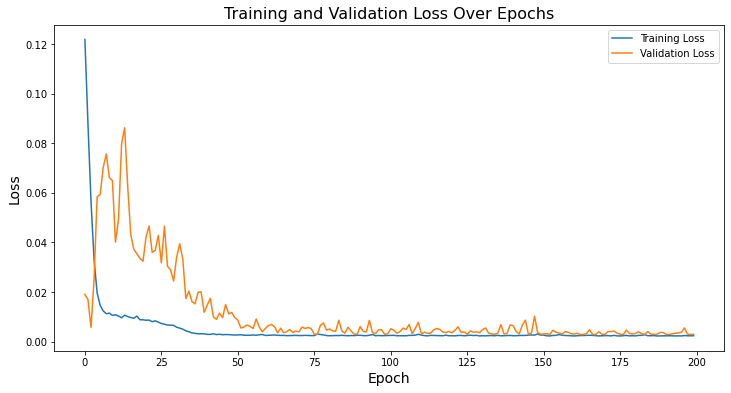

In [31]:

# Plot training and validation loss to monitor overfitting
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend()
plt.show()

# Explanation:
# - If the training loss keeps decreasing while the validation loss increases, it may indicate overfitting.
# - The model's performance on unseen data (validation loss) should generally improve along with the training loss.
